# Justin Zarkovacki CS-4820
## 9/20/2022

### Required imports

In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, AveragePooling2D, Flatten, Dense
from keras import backend as K
import numpy as np
from matplotlib import pyplot as plt

### Create Function Definintions and Variables

In [75]:
batch_size = 128
epochs = 12
img_rows, img_cols = 28, 28  # Image dimensions

def load(f):
    return np.load(f)['arr_0']

# Generate a model based on the number of classes in the output layer
def generate_model(num_of_classes, input_shape):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(AveragePooling2D(pool_size=(2, 2), strides=None, padding="valid"))
    model.add(Flatten())
    model.add(Dense(num_of_classes, activation='relu'))
    model.add(Dense(num_of_classes))

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  optimizer="adam",
                  metrics=['accuracy'])
    
    return model
    
def initialize_data(train_im_file, test_im_file, train_lb_file, test_lb_file):
    train_images = load(train_im_file)
    test_images = load(test_im_file)
    train_labels = load(train_lb_file)
    test_labels = load(test_lb_file)
    
    if K.image_data_format() == 'channels_first':
        train_images = train_images.reshape(train_images.shape[0], 1, img_rows, img_cols)
        test_images = test_images.reshape(test_images.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
        test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    train_images = train_images.astype('float32')
    test_images = test_images.astype('float32')
    train_images /= 255
    test_images /= 255
    print('{} train samples, {} test samples'.format(len(train_images), len(test_images)))
    
    return tuple([train_images, test_images, train_labels, test_labels, input_shape])

# Helper to create the graphics
def create_visuals(graph_title, model_hist, test_images, test_labels):
    accuracy_data = model_hist.history['accuracy']
    val_accuracy_data = model_hist.history['val_accuracy']

    lower_bound = min(min(accuracy_data), min(val_accuracy_data))

    plt.plot(accuracy_data, label='Train Accuracy')
    plt.plot(val_accuracy_data, label = 'Validation Accuracy')

    plt.title(graph_title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([lower_bound - 0.01, 1])
    plt.legend(loc='lower right')

    print(accuracy_data[-1])
    print(val_accuracy_data[-1])
#     test_loss, test_acc = model_hist.evaluate(test_images, test_labels, verbose=2)

### Initialize training/test datasets and other important variables

In [66]:
prefix = '..\..\Datasets\\'
datasets = {
    "km_tr_i" : prefix + 'Kuzushiji-MNIST - train-imgs.npz',
    "km_te_i" : prefix + 'Kuzushiji-MNIST - test-imgs.npz',
    "km_tr_l" : prefix + 'Kuzushiji-MNIST - train-labels.npz',
    "km_te_l" : prefix + 'Kuzushiji-MNIST - test-labels.npz',
    "k49_tr_i" : prefix + 'Kuzushiji-49 - train-imgs.npz',
    "k49_te_i" : prefix + 'Kuzushiji-49 - test-imgs.npz',
    "k49_tr_l" : prefix + 'Kuzushiji-49 - train-labels.npz',
    "k49_te_l" : prefix + 'Kuzushiji-49 - test-labels.npz',
    "kanji" : prefix + 'midterm_dataset'
}

# Load MNIST Data
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()
mnist_input_shape = (28, 28, 1)

# Load KMNIST Data
dataset = initialize_data(datasets["km_tr_i"], datasets["km_te_i"], datasets["km_tr_l"], datasets["km_te_l"])
kmnist_train_images = dataset[0]
kmnist_test_images = dataset[1]
kmnist_train_labels = dataset[2]
kmnist_test_labels  = dataset[3]
kmnist_input_shape = dataset[4]

# Load Kuzushiji-49 Data
dataset = initialize_data(datasets["k49_tr_i"], datasets["k49_te_i"], datasets["k49_tr_l"], datasets["k49_te_l"])
k49_train_images = dataset[0]
k49_test_images = dataset[1]
k49_train_labels = dataset[2]
k49_test_labels  = dataset[3]
k49_input_shape = dataset[4]

# Load Kanji Data
kanji_input_shape = (64, 64, 3)
kanji_dataset_train = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="training", image_size=(64, 64), batch_size=32)

kanji_dataset_val = tf.keras.utils.image_dataset_from_directory(datasets["kanji"], validation_split=0.3,
                        seed=222, subset="validation", image_size=(64, 64), batch_size=32)

60000 train samples, 10000 test samples
232365 train samples, 38547 test samples
Found 40857 files belonging to 50 classes.
Using 28600 files for training.
Found 40857 files belonging to 50 classes.
Using 12257 files for validation.


### Create Model - MNIST

In [38]:
num_classes = 10
mnist_model = generate_model(num_classes, mnist_input_shape)
mnist_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_1 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                92170     
                                                      

### Run Model - MNIST

In [39]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

mnist_history = mnist_model.fit(mnist_train_images, mnist_train_labels, batch_size=batch_size,
                                epochs=epochs, callbacks=callback, verbose=1,
                                validation_data=(mnist_test_images, mnist_test_labels))

mnist_model.save('justin_mnist_model')

Epoch 1/12
469/469 [==============================] - 68s 144ms/step - loss: 1.9343 - accuracy: 0.2569 - val_loss: 1.2501 - val_accuracy: 0.5538
Epoch 2/12
469/469 [==============================] - 70s 150ms/step - loss: 0.9650 - accuracy: 0.6420 - val_loss: 0.7076 - val_accuracy: 0.7599
Epoch 3/12
469/469 [==============================] - 73s 155ms/step - loss: 0.6323 - accuracy: 0.7728 - val_loss: 0.4814 - val_accuracy: 0.9080
Epoch 4/12
469/469 [==============================] - 75s 160ms/step - loss: 0.3567 - accuracy: 0.9265 - val_loss: 0.2537 - val_accuracy: 0.9487
Epoch 5/12
469/469 [==============================] - 78s 166ms/step - loss: 0.2371 - accuracy: 0.9432 - val_loss: 0.1884 - val_accuracy: 0.9564
Epoch 6/12
469/469 [==============================] - 78s 167ms/step - loss: 0.1870 - accuracy: 0.9530 - val_loss: 0.1829 - val_accuracy: 0.9519
Epoch 7/12
469/469 [==============================] - 76s 161ms/step - loss: 0.1582 - accuracy: 0.9584 - val_loss: 0.1413 - val_ac

### Visualize Results - MNIST

0.9818166494369507
0.9731000065803528


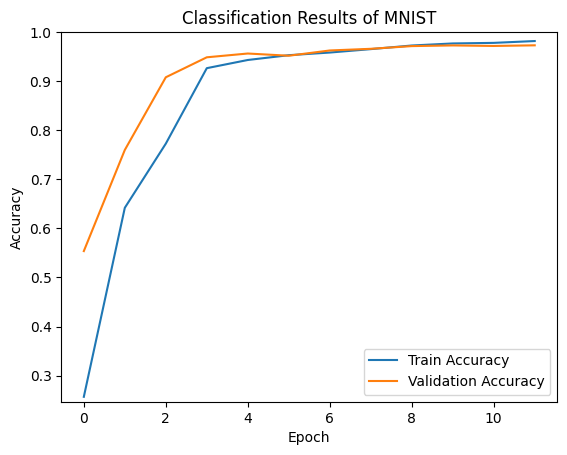

In [87]:
create_visuals("Classification Results of MNIST", mnist_history, mnist_test_images, mnist_test_labels)

### Create Model - KMNIST

In [21]:
num_classes = 10
kmnist_model = generate_model(num_classes, kmnist_input_shape)
kmnist_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dropout (Dropout)           (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 64)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                      

### Run Model - KMNIST

In [23]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kmnist_history = kmnist_model.fit(kmnist_train_images, kmnist_train_labels, batch_size=batch_size, 
              epochs=epochs, callbacks=callback, verbose=1,
                                  validation_data=(kmnist_test_images, kmnist_test_labels))

kmnist_model.save('justin_kmnist_model')

Epoch 1/12
469/469 [==============================] - 86s 179ms/step - loss: 0.7234 - accuracy: 0.7715 - val_loss: 0.7417 - val_accuracy: 0.7884
Epoch 2/12
469/469 [==============================] - 84s 180ms/step - loss: 0.3042 - accuracy: 0.9128 - val_loss: 0.5630 - val_accuracy: 0.8332
Epoch 3/12
469/469 [==============================] - 84s 179ms/step - loss: 0.2242 - accuracy: 0.9354 - val_loss: 0.4748 - val_accuracy: 0.8627
Epoch 4/12
469/469 [==============================] - 83s 177ms/step - loss: 0.1759 - accuracy: 0.9485 - val_loss: 0.4438 - val_accuracy: 0.8753
Epoch 5/12
469/469 [==============================] - 83s 176ms/step - loss: 0.1423 - accuracy: 0.9579 - val_loss: 0.3774 - val_accuracy: 0.8905
Epoch 6/12
469/469 [==============================] - 84s 179ms/step - loss: 0.1188 - accuracy: 0.9646 - val_loss: 0.3576 - val_accuracy: 0.9008
Epoch 7/12
469/469 [==============================] - 85s 181ms/step - loss: 0.1020 - accuracy: 0.9706 - val_loss: 0.3423 - val_ac

### Visualize Results - KMNIST

0.9851333498954773
0.9108999967575073


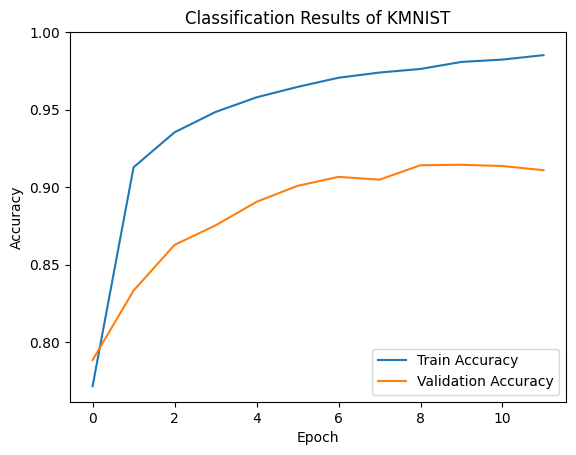

In [86]:
create_visuals("Classification Results of KMNIST", kmnist_history, kmnist_train_images, kmnist_train_labels)

### Create Model - Kuzushiji-49

In [82]:
num_classes = 49
k49_model = generate_model(num_classes, k49_input_shape)
k49_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 dropout_8 (Dropout)         (None, 26, 26, 32)        0         
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 average_pooling2d_8 (Averag  (None, 12, 12, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_8 (Flatten)         (None, 9216)              0         
                                                                 
 dense_16 (Dense)            (None, 49)                451633    
                                                     

### Run Model - Kuzushiji-49

In [83]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

k49_history = k49_model.fit(k49_train_images, k49_train_labels, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=(k49_test_images, k49_test_labels))

k49_model.save('justin_k49_model')

Epoch 1/12
1816/1816 [==============================] - 299s 164ms/step - loss: 0.7348 - accuracy: 0.8117 - val_loss: 0.7405 - val_accuracy: 0.8116
Epoch 2/12
1816/1816 [==============================] - 316s 174ms/step - loss: 0.3366 - accuracy: 0.9093 - val_loss: 0.5772 - val_accuracy: 0.8557
Epoch 3/12
1816/1816 [==============================] - 315s 174ms/step - loss: 0.2484 - accuracy: 0.9320 - val_loss: 0.5125 - val_accuracy: 0.8714
Epoch 4/12
1816/1816 [==============================] - 314s 173ms/step - loss: 0.1958 - accuracy: 0.9459 - val_loss: 0.4728 - val_accuracy: 0.8825
Epoch 5/12
1816/1816 [==============================] - 314s 173ms/step - loss: 0.1566 - accuracy: 0.9558 - val_loss: 0.4667 - val_accuracy: 0.8895
Epoch 6/12
1816/1816 [==============================] - 311s 171ms/step - loss: 0.1283 - accuracy: 0.9631 - val_loss: 0.4686 - val_accuracy: 0.8906
Epoch 7/12
1816/1816 [==============================] - 297s 164ms/step - loss: 0.1049 - accuracy: 0.9693 - val_

### Vizualize Results - Kuzushiji-49

0.9728874564170837
0.8931953310966492


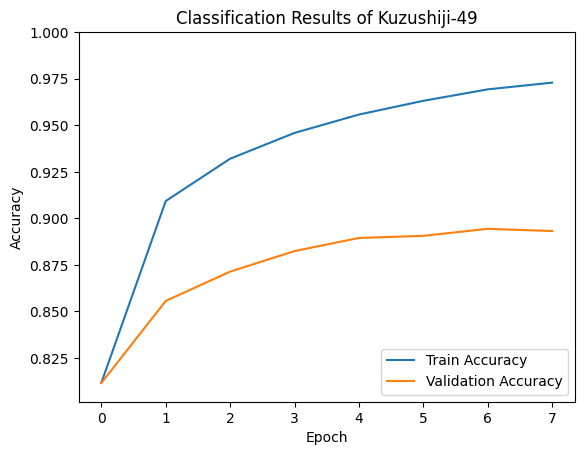

In [88]:
create_visuals("Classification Results of Kuzushiji-49", k49_history, k49_train_images, k49_train_labels)

### Prepare Dataset - Kanji

(32, 64, 64, 3)
(32,)
0.0 1.0


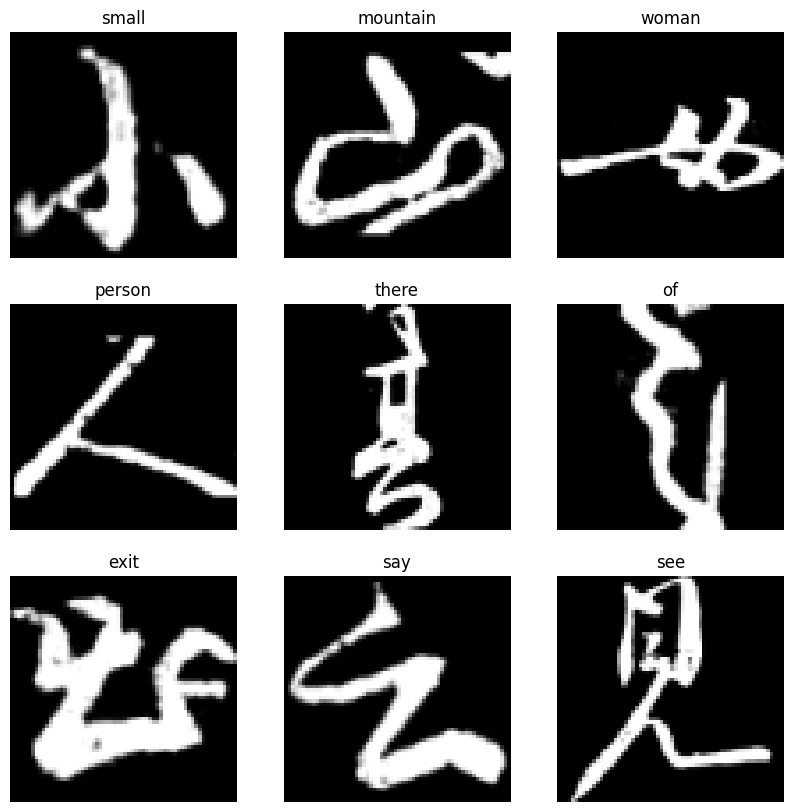

In [67]:
# Load classes
class_names = kanji_dataset_train.class_names

# Show some data to prove load worked
plt.figure(figsize=(10, 10))
for images, labels in kanji_dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in kanji_dataset_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
    
# Rescale Data
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = kanji_dataset_train.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) # Notice the pixel values are now in `[0,1]`.

# Training performane optimizations
AUTOTUNE = tf.data.AUTOTUNE

train_ds = kanji_dataset_train.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = kanji_dataset_val.cache().prefetch(buffer_size=AUTOTUNE)

### Create Model - Kanji

In [68]:
num_classes = 50
kanji_model = generate_model(num_classes, kanji_input_shape)
kanji_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_7 (Dropout)         (None, 62, 62, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 average_pooling2d_7 (Averag  (None, 30, 30, 64)       0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 57600)             0         
                                                                 
 dense_14 (Dense)            (None, 50)                2880050   
                                                     

### Run Model - Kanji

In [69]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

kanji_history = kanji_model.fit(kanji_dataset_train, batch_size=batch_size, epochs=epochs,
              callbacks=callback, verbose=1, validation_data=kanji_dataset_val)

kanji_model.save('justin_kanji_model')

Epoch 1/12
894/894 [==============================] - 258s 288ms/step - loss: 2.6594 - accuracy: 0.5031 - val_loss: 1.0466 - val_accuracy: 0.7268
Epoch 2/12
894/894 [==============================] - 263s 294ms/step - loss: 0.5801 - accuracy: 0.8440 - val_loss: 0.7117 - val_accuracy: 0.8110
Epoch 3/12
894/894 [==============================] - 280s 313ms/step - loss: 0.2838 - accuracy: 0.9194 - val_loss: 0.6689 - val_accuracy: 0.8328
Epoch 4/12
894/894 [==============================] - 275s 307ms/step - loss: 0.1644 - accuracy: 0.9513 - val_loss: 0.7275 - val_accuracy: 0.8423
Epoch 5/12
894/894 [==============================] - 273s 305ms/step - loss: 0.1195 - accuracy: 0.9643 - val_loss: 0.7656 - val_accuracy: 0.8505
Epoch 6/12
894/894 [==============================] - 264s 296ms/step - loss: 0.1020 - accuracy: 0.9687 - val_loss: 0.7485 - val_accuracy: 0.8542
INFO:tensorflow:Assets written to: justin_kanji_model\assets


### Visualize Results - Kanji

0.968741238117218
0.8542057871818542


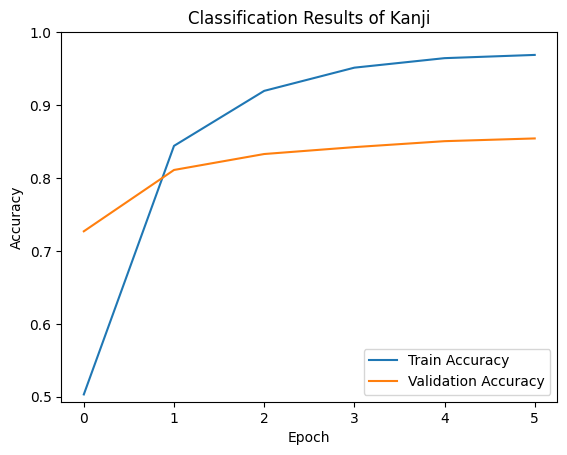

In [76]:
create_visuals("Classification Results of Kanji", kanji_history, kanji_dataset_val, kanji_dataset_val)